<a href="https://colab.research.google.com/github/jeaminj/regression_models/blob/main/sphk1_gaussianpr_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Gaussian Process Regressor Model fit for Sphingosine Kinase 1 Protein (wip)***

Import libraries

In [ ]:
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

retrieve dataset

In [ ]:
! wget https://github.com/jeaminj/data/raw/main/sphk1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2022-10-11 20:57:58--  https://github.com/jeaminj/data/raw/main/sphk1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jeaminj/data/main/sphk1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2022-10-11 20:57:58--  https://raw.githubusercontent.com/jeaminj/data/main/sphk1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 649403 (634K) [text/plain]
Saving to: ‘sphk1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’

sphk1_06_bioactivit 100%[===================>] 634.18K  --.-KB/s    in 0

this file contains the fingerprint and pIC50 values of our model compounds

In [ ]:
#read and attribute file to dataframe
df = pd.read_csv('sphk1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.244125
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.481486
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.920819
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.413413
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.663540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
355,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
356,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
357,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000


Want to remove 'pIC150' column for our X variable matrix



In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
355,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
356,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
357,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Our Y matrix will be the dropped pIC150 values

In [ ]:
Y = df.pIC50
Y

0      5.244125
1      5.481486
2      5.920819
3      5.413413
4      5.663540
         ...   
354    5.000000
355    5.000000
356    5.000000
357    5.000000
358    5.000000
Name: pIC50, Length: 359, dtype: float64

Remove low variance features from the dataset as they are not particularly useful in model building

In [8]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
X = selection.fit_transform(X)

In [9]:
X.shape

(359, 159)

**Data Split (80/20)**

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
X_train.shape, Y_train.shape

((287, 159), (287,))

In [13]:
X_test.shape, Y_test.shape

((72, 159), (72,))

# Gaussian Process Regression Model

In [15]:
kernel = DotProduct() + WhiteKernel()
model = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(X_train, Y_train)
model.score(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5020967857738547

In [20]:
Y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

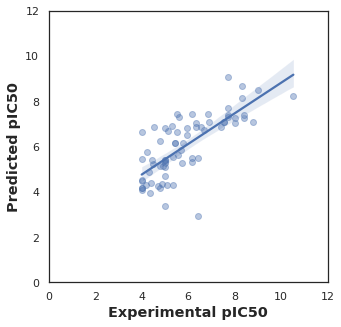

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show